In [9]:
import pandas as pd

# Load the dataset with an alternative encoding
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

# Check the first few rows to understand the structure
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

	2.	Handle Missing Values:
Check for missing values and decide how to handle them. For numerical columns, you might want to fill them with the median or mean. For categorical columns, you can fill them with the most frequent value (mode) or drop them.

In [14]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the median
df.fillna(df.median(), inplace=True)

# Fill missing categorical values with mode
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


TypeError: Cannot convert [['CA-2016-152156' 'CA-2016-152156' 'CA-2016-138688' ... 'CA-2017-121258'
  'CA-2017-121258' 'CA-2017-119914']
 ['11/8/2016' '11/8/2016' '6/12/2016' ... '2/26/2017' '2/26/2017'
  '5/4/2017']
 ['11/11/2016' '11/11/2016' '6/16/2016' ... '3/3/2017' '3/3/2017'
  '5/9/2017']
 ...
 ['Furniture' 'Furniture' 'Office Supplies' ... 'Technology'
  'Office Supplies' 'Office Supplies']
 ['Bookcases' 'Chairs' 'Labels' ... 'Phones' 'Paper' 'Appliances']
 ['Bush Somerset Collection Bookcase'
  'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back'
  'Self-Adhesive Address Labels for Typewriters by Universal' ...
  'Aastra 57i VoIP phone'
  'It\'s Hot Message Books with Stickers, 2 3/4" x 5"'
  'Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection']] to numeric

#Error---> trying to apply median() on non-nmeric columns
#Solution---> restrict to only muneric columns.

In [18]:
# Fill missing numerical values with the median for numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/4122992858.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(df['Category'].mode()[0], inplace=True)


In [21]:
# Instead of using inplace=True, assign the result directly back to the column
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])

In [23]:
#Format Dates
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [25]:
import matplotlib.pyplot as plt

# Total sales by month and year (creating a Year-Month column for grouping)
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Grouping the data by Year-Month to find sales trends
sales_trend = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Total sales by product category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Total sales by region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Display the data for review
sales_trend.head(), sales_by_category, sales_by_region

(  Year-Month      Sales
 0    2014-01  14236.895
 1    2014-02   4519.892
 2    2014-03  55691.009
 3    2014-04  28295.345
 4    2014-05  23648.287,
           Category        Sales
 0        Furniture  741999.7953
 1  Office Supplies  719047.0320
 2       Technology  836154.0330,
     Region        Sales
 0  Central  501239.8908
 1     East  678781.2400
 2    South  391721.9050
 3     West  725457.8245)

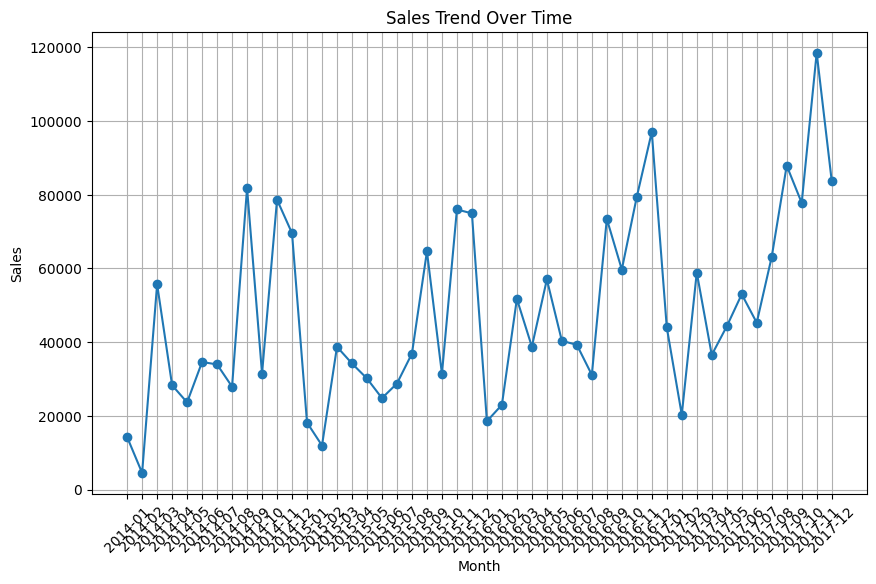

In [27]:
# Plotting sales trends by month
plt.figure(figsize=(10,6))
plt.plot(sales_trend['Year-Month'].astype(str), sales_trend['Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

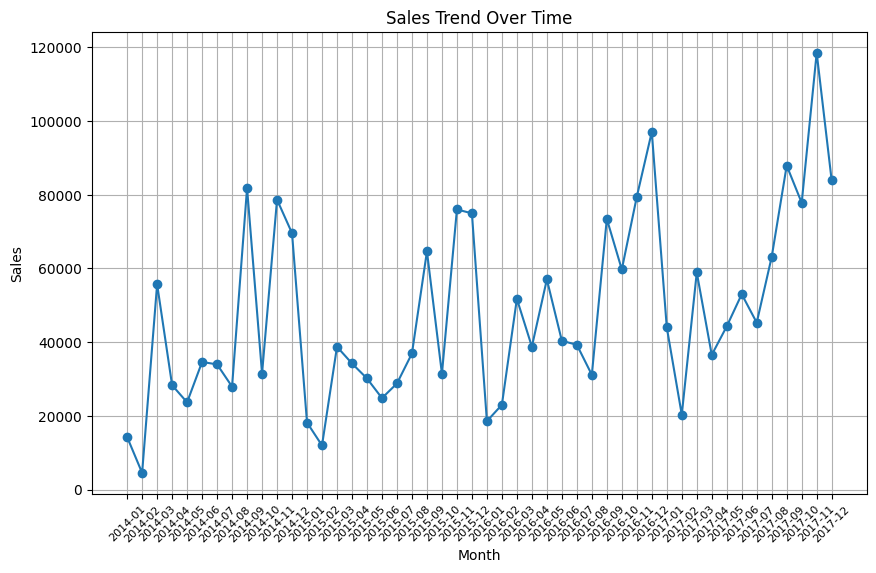

In [29]:
import matplotlib.pyplot as plt

# Adjusting the font size for the x-axis labels to avoid overlap
plt.figure(figsize=(10,6))
plt.plot(sales_trend['Year-Month'].astype(str), sales_trend['Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45, fontsize=8)  # Set font size to 8 for x-axis labels
plt.grid(True)
plt.show()

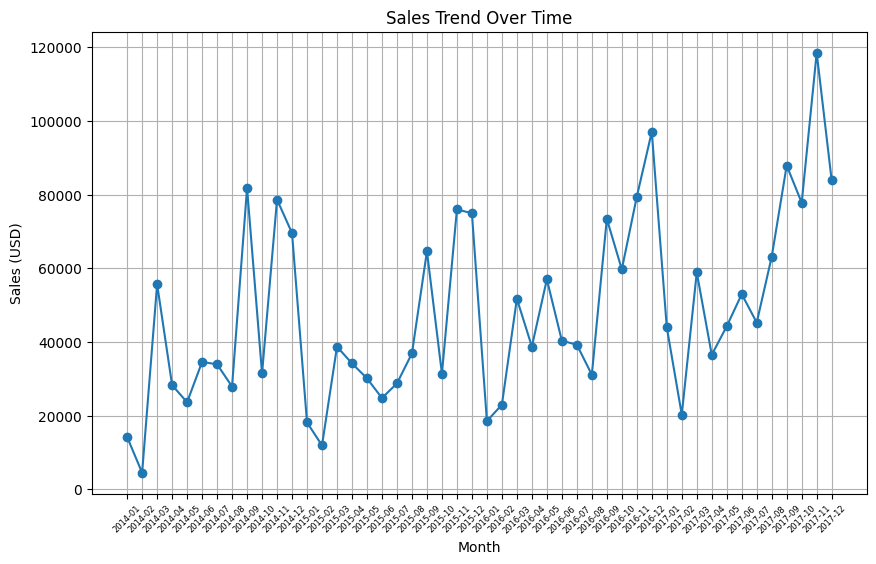

In [33]:
import matplotlib.pyplot as plt

# Adjusting the font size for the x-axis labels to avoid overlap
plt.figure(figsize=(10,6))
plt.plot(sales_trend['Year-Month'].astype(str), sales_trend['Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45, fontsize=6)  # Set font size to 8 for x-axis labels
plt.grid(True)
plt.ylabel('Sales (USD)')  # Change 'USD' to the appropriate currency if needed
plt.show()


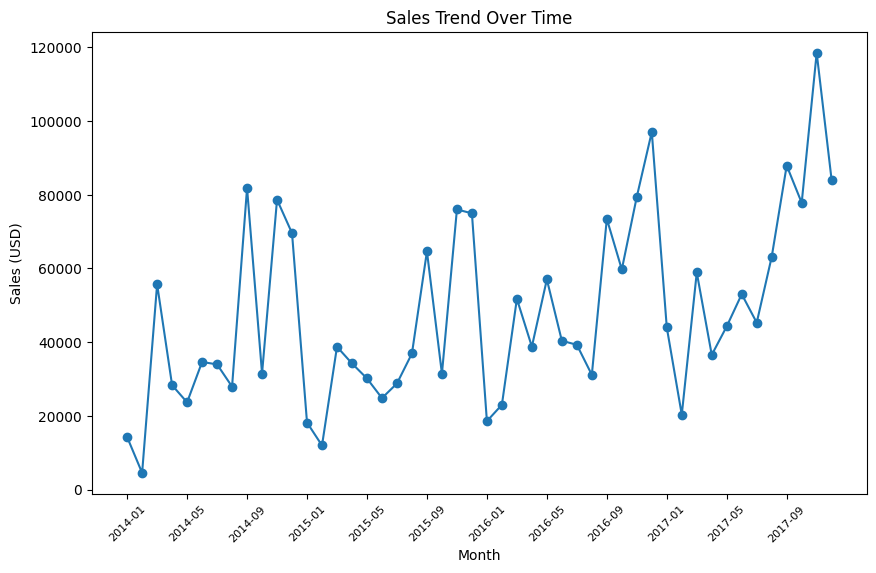

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming sales_trend is already calculated

# Adjusting the x-axis to show every 4 months
plt.figure(figsize=(10,6))
plt.plot(sales_trend['Year-Month'].astype(str), sales_trend['Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')

# Modify x-axis to show every 4th month
plt.xticks(ticks=range(0, len(sales_trend['Year-Month']), 4), 
           labels=sales_trend['Year-Month'].astype(str)[::4], 
           rotation=45, fontsize=8)

plt.show()

#Further Analysis of Sales by Category and Region

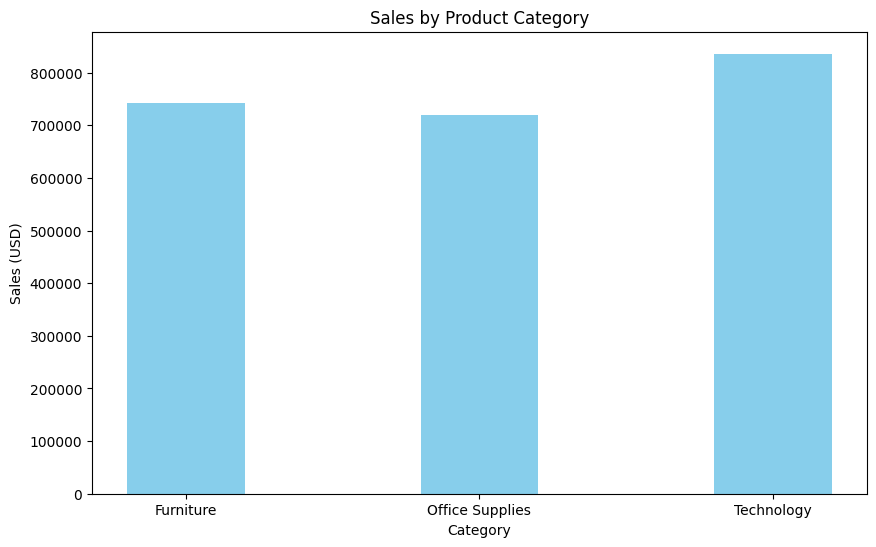

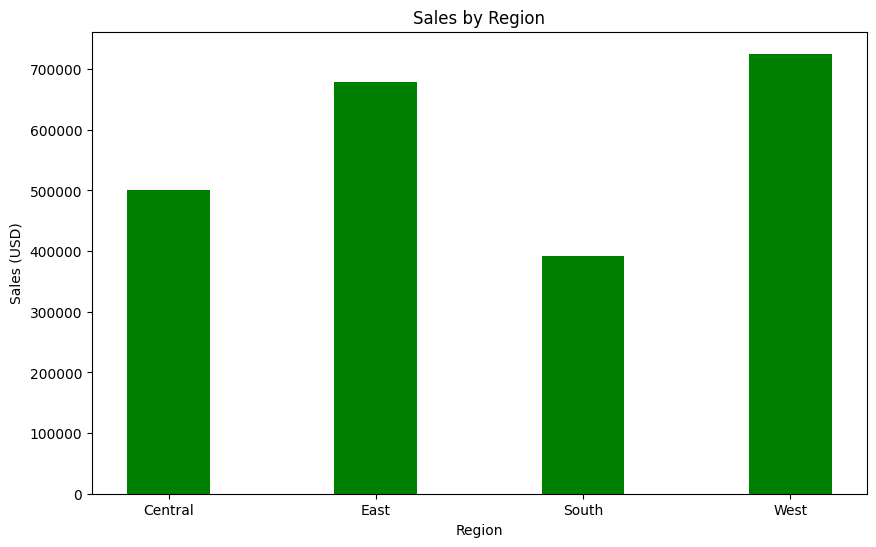

In [42]:
# Bar chart for sales by category
import matplotlib.pyplot as plt

# Plotting sales by product category with thinner bars
plt.figure(figsize=(10,6))  # Set the width to 10 like the previous line chart
plt.bar(sales_by_category['Category'], sales_by_category['Sales'], color='skyblue', width=0.4)  # Adjust the bar width
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales (USD)')
plt.show()

# Plotting sales by region with thinner bars
plt.figure(figsize=(10,6))  # Set the width to 10 like the previous line chart
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='green', width=0.4)  # Adjust the bar width
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (USD)')
plt.show()

Profitability

In [46]:
import pandas as pd

# Grouping data by region to calculate total profit by region
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

# Grouping data by product category to calculate total profit by category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

# Grouping data by customer segment to calculate total profit by segment
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()

# Display the results
print("Profit by Region:")
print(profit_by_region)

print("\nProfit by Product Category:")
print(profit_by_category)

print("\nProfit by Customer Segment:")
print(profit_by_segment)

Profit by Region:
    Region       Profit
0  Central   39706.3625
1     East   91522.7800
2    South   46749.4303
3     West  108418.4489

Profit by Product Category:
          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481

Profit by Customer Segment:
       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785


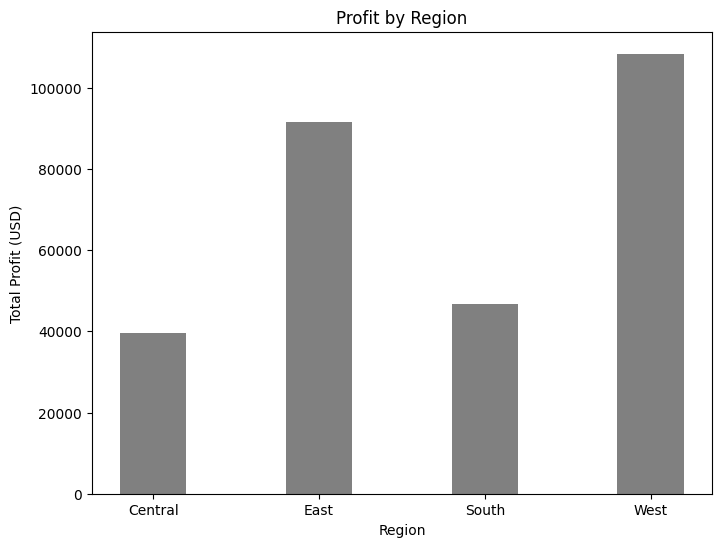

In [60]:
#Bar Chart for Profit by Region
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Profit by Region (Gray bars)
plt.figure(figsize=(8,6))
plt.bar(profit_by_region['Region'], profit_by_region['Profit'], color='gray', width=0.4)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit (USD)')
plt.show()

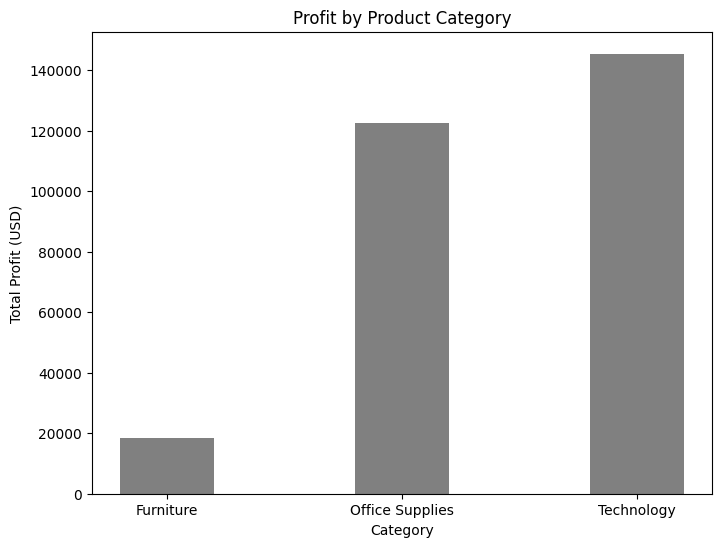

In [62]:
# Profit by Category (Gray bars)
plt.figure(figsize=(8,6))
plt.bar(profit_by_category['Category'], profit_by_category['Profit'], color='gray', width=0.4)
plt.title('Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Profit (USD)')
plt.show()

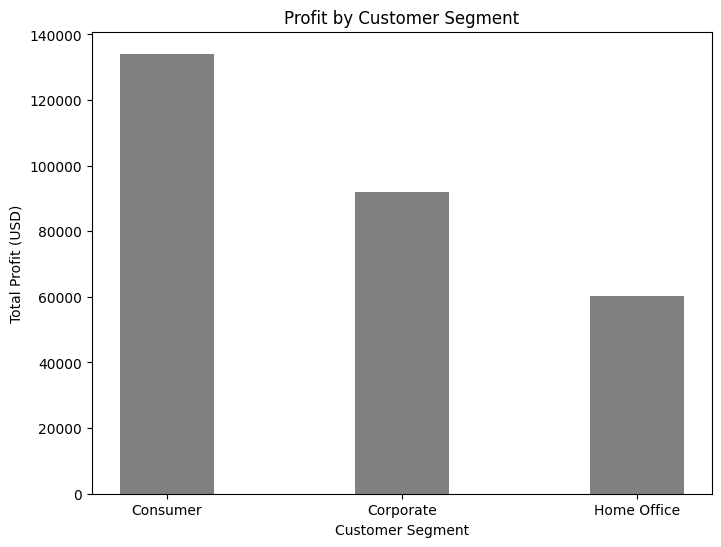

In [64]:
# Profit by Segment (Thinner bars)
# Profit by Segment (Gray bars)
plt.figure(figsize=(8,6))
plt.bar(profit_by_segment['Segment'], profit_by_segment['Profit'], color='gray', width=0.4)
plt.title('Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit (USD)')
plt.show()

#Customer Segnment Analysis

In [69]:
import pandas as pd

# 1. Grouping sales and profit data by customer segments
sales_and_profit_by_segment = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# 2. Calculating the average order size per segment
# Average Order Size = Total Sales / Total Number of Orders (using Order ID count per segment)
average_order_size_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Order ID': 'nunique'}).reset_index()
average_order_size_by_segment['Avg Order Size'] = average_order_size_by_segment['Sales'] / average_order_size_by_segment['Order ID']

# Displaying the results
print("Sales and Profit by Segment:")
print(sales_and_profit_by_segment)

print("\nAverage Order Size by Segment:")
print(average_order_size_by_segment)

Sales and Profit by Segment:
       Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785

Average Order Size by Segment:
       Segment         Sales  Order ID  Avg Order Size
0     Consumer  1.161401e+06      2586      449.111116
1    Corporate  7.061464e+05      1514      466.411075
2  Home Office  4.296531e+05       909      472.665730


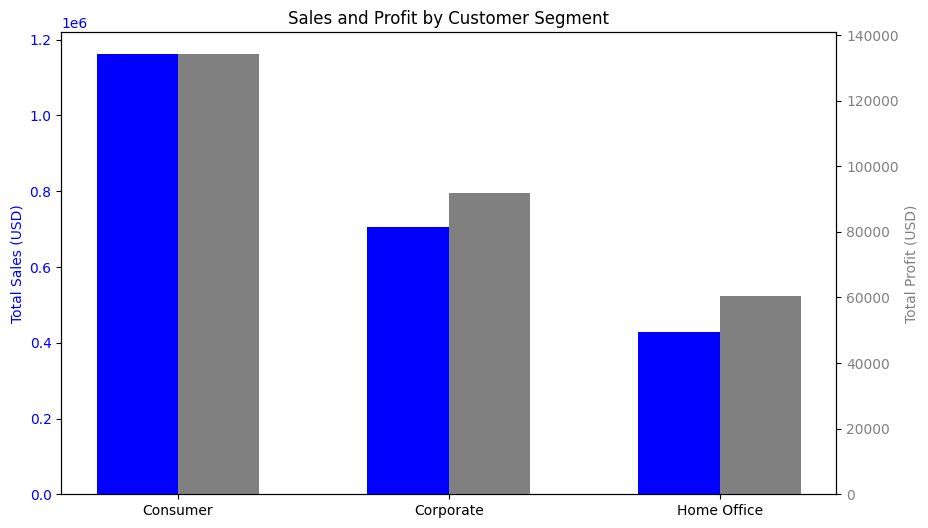

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Set the positions for the bars
bar_width = 0.3  # Set the width of the bars
index = np.arange(len(sales_and_profit_by_segment['Segment']))  # Bar positions

# Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sales bars (left side) in blue
ax1.bar(index - bar_width/2, sales_and_profit_by_segment['Sales'], color='blue', width=bar_width, label='Sales')
ax1.set_ylabel('Total Sales (USD)', color='blue')  # Match the y-axis color to the Sales bars
ax1.set_title('Sales and Profit by Customer Segment')
ax1.tick_params(axis='y', labelcolor='blue')  # Set tick labels to match the axis color
ax1.set_xticks(index)
ax1.set_xticklabels(sales_and_profit_by_segment['Segment'])

# Create a twin y-axis for Profit
ax2 = ax1.twinx()

# Plot Profit bars (right side) in gray
ax2.bar(index + bar_width/2, sales_and_profit_by_segment['Profit'], color='gray', width=bar_width, label='Profit')
ax2.set_ylabel('Total Profit (USD)', color='gray')  # Match the y-axis color to the Profit bars
ax2.tick_params(axis='y', labelcolor='gray')  # Set tick labels to match the axis color

plt.show()

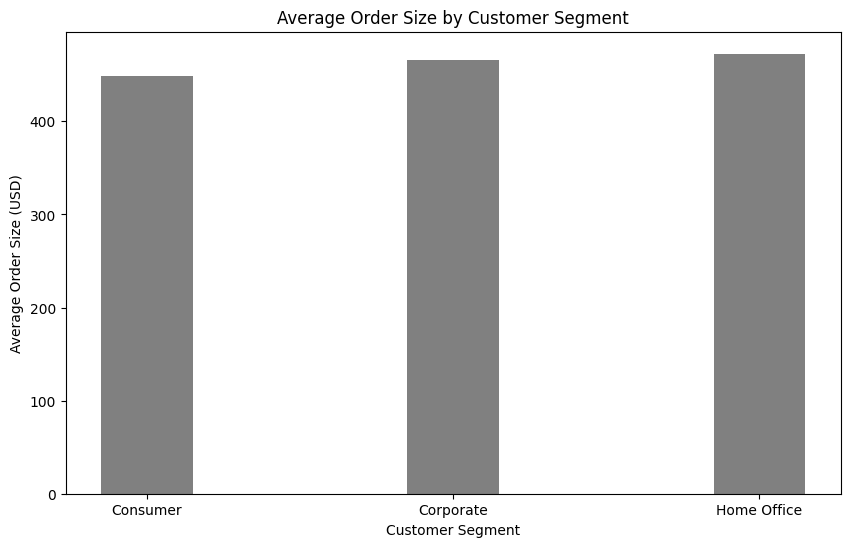

In [79]:
# Bar chart for Average Order Size by Segment with gray, thinner bars
plt.figure(figsize=(10, 6))
plt.bar(average_order_size_by_segment['Segment'], average_order_size_by_segment['Avg Order Size'], color='gray', width=0.3)  # Thinner bars and gray color
plt.title('Average Order Size by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Size (USD)')
plt.show()

Correlation between Discount and Profit:
          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000

Average Profit by Discount Level:
  Discount Level      Profit
0            Low   96.055074
1         Medium   24.738824
2           High -109.528873


/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/874589676.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_discount_level = df.groupby('Discount Level')['Profit'].mean().reset_index()


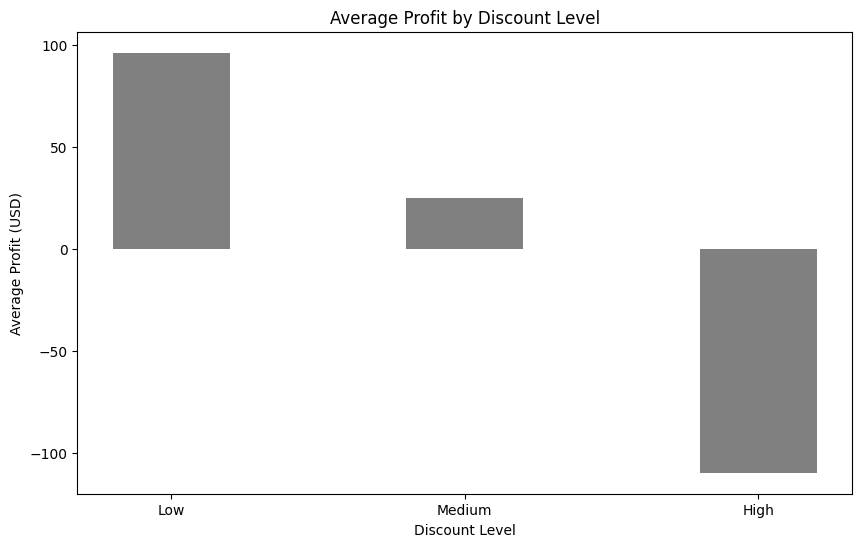

In [81]:
# Step 1: Correlation Analysis Between Discount and Profit
# This will help us understand if higher discounts reduce profitability.

# Calculate the correlation between Discount and Profit
discount_profit_correlation = df[['Discount', 'Profit']].corr()

# Display the correlation result
print("Correlation between Discount and Profit:")
print(discount_profit_correlation)

# Step 2: Segmenting Data by Discount Levels (Low, Medium, High)
# We'll segment discount into Low (0-10%), Medium (10-20%), and High (20-50%) levels.

# Create discount level bins and assign labels
df['Discount Level'] = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.5], labels=['Low', 'Medium', 'High'])

# Group by Discount Level and calculate the average profit for each segment
profit_by_discount_level = df.groupby('Discount Level')['Profit'].mean().reset_index()

# Display the profit by discount level table
print("\nAverage Profit by Discount Level:")
print(profit_by_discount_level)

# Step 3: Visualizing the Profit by Discount Level
# We'll create a bar chart to show how average profit varies across discount levels.

import matplotlib.pyplot as plt

# Bar chart for Profit by Discount Level
plt.figure(figsize=(10, 6))
plt.bar(profit_by_discount_level['Discount Level'], profit_by_discount_level['Profit'], color='gray', width=0.4)
plt.title('Average Profit by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Average Profit (USD)')
plt.show()

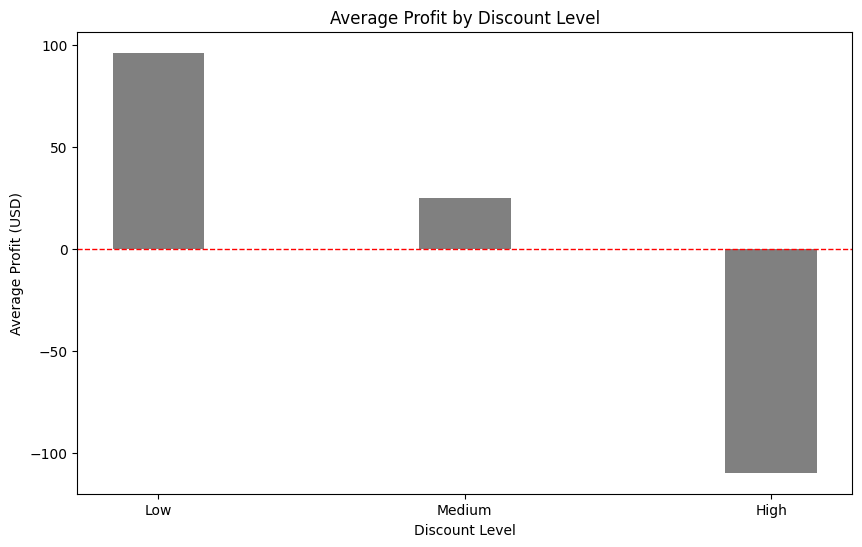

In [83]:
import matplotlib.pyplot as plt

# Bar chart for Profit by Discount Level with thinner bars and horizontal line at 0
plt.figure(figsize=(10, 6))

# Plotting thinner bars
plt.bar(profit_by_discount_level['Discount Level'], profit_by_discount_level['Profit'], color='gray', width=0.3)

# Add a horizontal line at 0 profit
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Adding title and labels
plt.title('Average Profit by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Average Profit (USD)')

# Display the chart
plt.show()

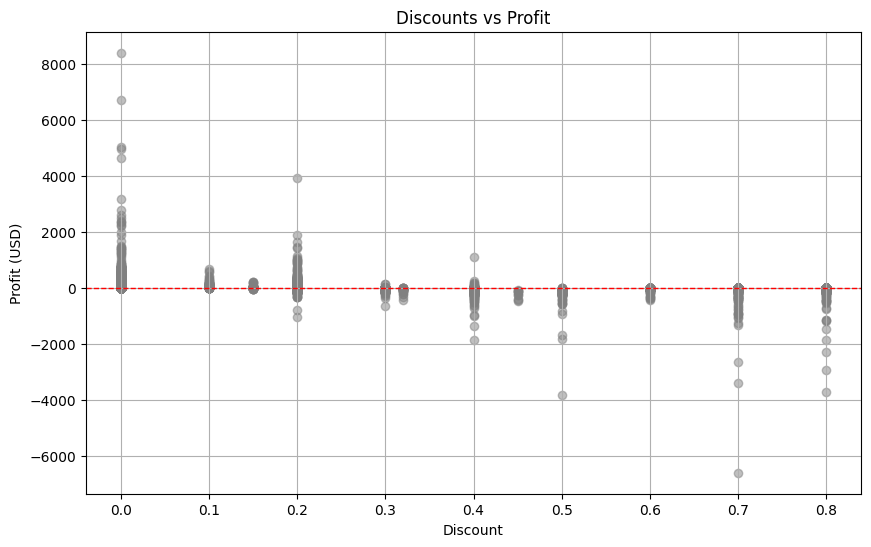

In [85]:
# Scatter plot of Discounts vs. Profit to show the relationship

plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], color='gray', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 profit
plt.title('Discounts vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit (USD)')
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

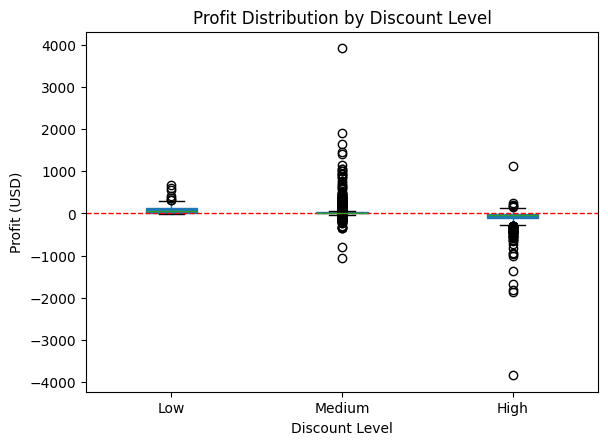

In [91]:
# Box plot to show the distribution of Profit across discount levels

plt.figure(figsize=(10, 6))
df.boxplot(column='Profit', by='Discount Level', grid=False, patch_artist=True)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 profit
plt.title('Profit Distribution by Discount Level')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by Discount Level' title
plt.xlabel('Discount Level')
plt.ylabel('Profit (USD)')

plt.show()

In [89]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the median
df.fillna(df.median(), inplace=True)

# Fill missing categorical values with mode
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Year-Month           0
Discount Level    5654
dtype: int64


TypeError: Cannot convert [['CA-2016-152156' 'CA-2016-152156' 'CA-2016-138688' ... 'CA-2017-121258'
  'CA-2017-121258' 'CA-2017-119914']] to numeric

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/1787374729.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_trend_by_discount = df.groupby(['Year', 'Discount Level'])['Profit'].sum().unstack().fillna(0)


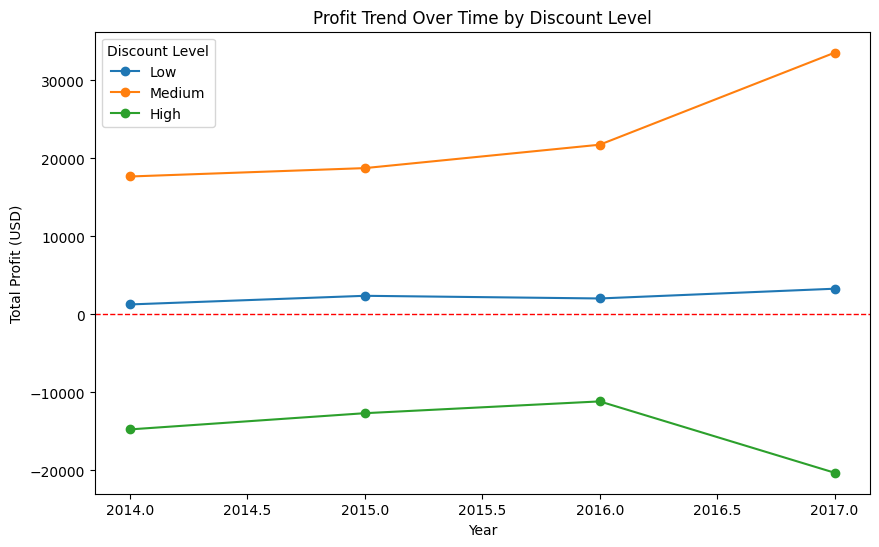

In [95]:
# Grouping the data by year and discount level to track profit trends over time
df['Year'] = df['Order Date'].dt.year  # Extract year from Order Date
profit_trend_by_discount = df.groupby(['Year', 'Discount Level'])['Profit'].sum().unstack().fillna(0)

# Line plot to visualize profit trends by discount level over the years
profit_trend_by_discount.plot(figsize=(10, 6), marker='o')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 profit
plt.title('Profit Trend Over Time by Discount Level')
plt.xlabel('Year')
plt.ylabel('Total Profit (USD)')
plt.show()

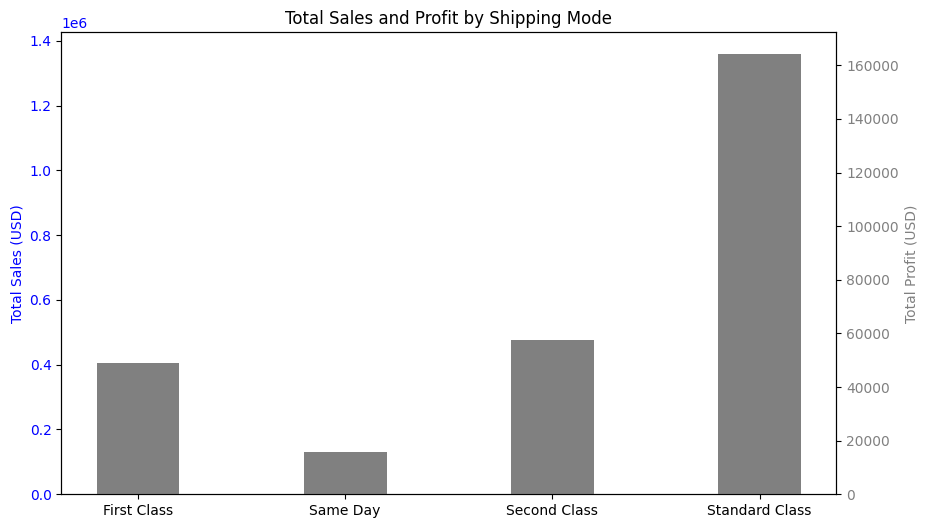

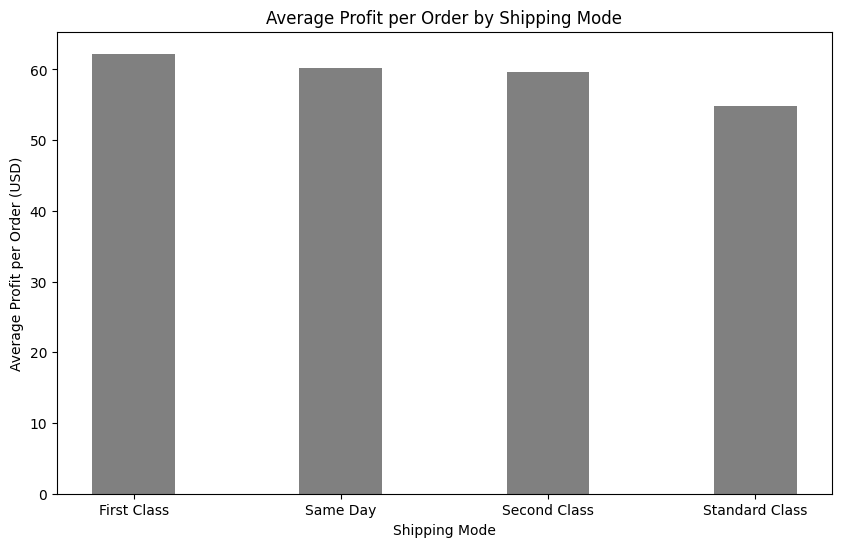

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that the dataset (df) is available and correct before running this code
# Step 1: Grouping Sales and Profit by Shipping Mode
sales_and_profit_by_ship_mode = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()

# Step 2: Calculating the Average Profit per Order for each Shipping Mode
average_profit_per_order_by_ship_mode = df.groupby('Ship Mode').agg({'Profit': 'sum', 'Order ID': 'nunique'}).reset_index()
average_profit_per_order_by_ship_mode['Avg Profit per Order'] = average_profit_per_order_by_ship_mode['Profit'] / average_profit_per_order_by_ship_mode['Order ID']

# Step 3: Visualizing Total Sales and Profit by Shipping Mode with original design but left axis labeled in blue

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Sales bars (left side) in blue
ax1.bar(sales_and_profit_by_ship_mode['Ship Mode'], sales_and_profit_by_ship_mode['Sales'], color='blue', width=0.4, label='Sales')
ax1.set_ylabel('Total Sales (USD)', color='blue')  # Label the left axis for Sales with blue color
ax1.tick_params(axis='y', labelcolor='blue')  # Match y-axis labels to blue

# Create a twin y-axis for Profit
ax2 = ax1.twinx()

# Plotting Profit bars (right side) in gray
ax2.bar(sales_and_profit_by_ship_mode['Ship Mode'], sales_and_profit_by_ship_mode['Profit'], color='gray', width=0.4, label='Profit')
ax2.set_ylabel('Total Profit (USD)', color='gray')  # Label the right axis for Profit with gray color
ax2.tick_params(axis='y', labelcolor='gray')  # Match y-axis labels to gray

plt.title('Total Sales and Profit by Shipping Mode')
plt.xlabel('Shipping Mode')

plt.show()

# Step 4: Visualizing Average Profit per Order by Shipping Mode (gray bars)
plt.figure(figsize=(10, 6))
plt.bar(average_profit_per_order_by_ship_mode['Ship Mode'], average_profit_per_order_by_ship_mode['Avg Profit per Order'], color='gray', width=0.4)
plt.title('Average Profit per Order by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit per Order (USD)')
plt.show()

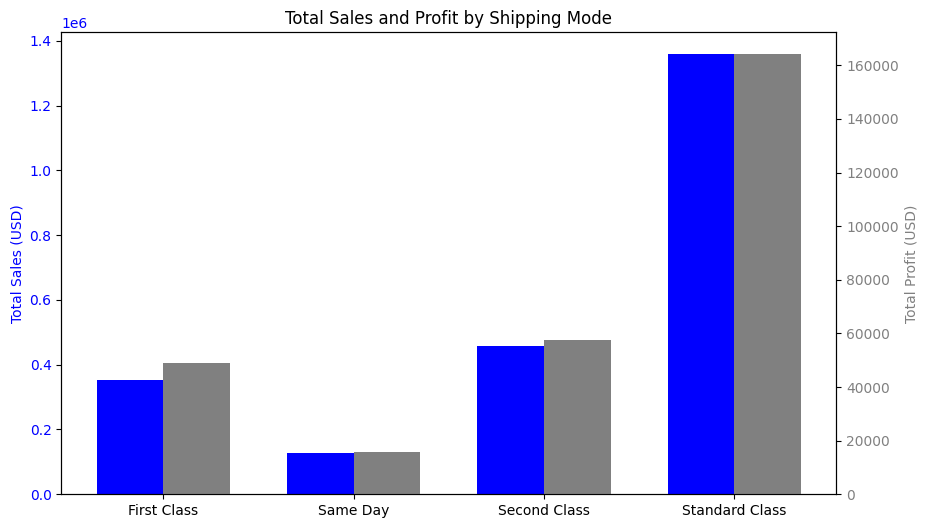

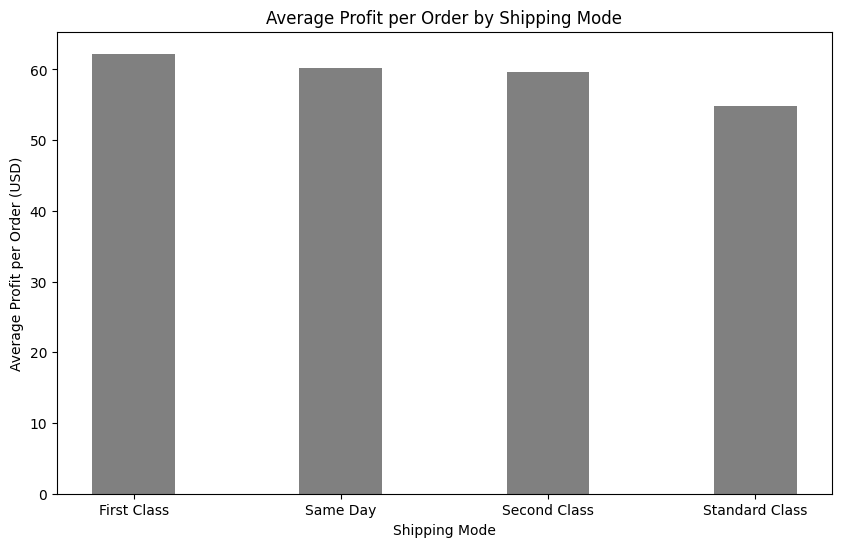

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Step 3: Visualizing Total Sales and Profit by Shipping Mode with side-by-side bars

# Set the positions for the bars
bar_width = 0.35  # Width of the bars
index = np.arange(len(sales_and_profit_by_ship_mode['Ship Mode']))  # Bar positions

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Sales bars (left side) in blue, shifted slightly to the left
ax1.bar(index - bar_width/2, sales_and_profit_by_ship_mode['Sales'], color='blue', width=bar_width, label='Sales')
ax1.set_ylabel('Total Sales (USD)', color='blue')  # Label the left axis for Sales with blue color
ax1.tick_params(axis='y', labelcolor='blue')  # Match y-axis labels to blue
ax1.set_xticks(index)
ax1.set_xticklabels(sales_and_profit_by_ship_mode['Ship Mode'])

# Create a twin y-axis for Profit
ax2 = ax1.twinx()

# Plotting Profit bars (right side) in gray, shifted slightly to the right
ax2.bar(index + bar_width/2, sales_and_profit_by_ship_mode['Profit'], color='gray', width=bar_width, label='Profit')
ax2.set_ylabel('Total Profit (USD)', color='gray')  # Label the right axis for Profit with gray color
ax2.tick_params(axis='y', labelcolor='gray')  # Match y-axis labels to gray

plt.title('Total Sales and Profit by Shipping Mode')
plt.xlabel('Shipping Mode')

plt.show()

# Step 4: Visualizing Average Profit per Order by Shipping Mode (gray bars)
plt.figure(figsize=(10, 6))
plt.bar(average_profit_per_order_by_ship_mode['Ship Mode'], average_profit_per_order_by_ship_mode['Avg Profit per Order'], color='gray', width=0.4)
plt.title('Average Profit per Order by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit per Order (USD)')
plt.show()

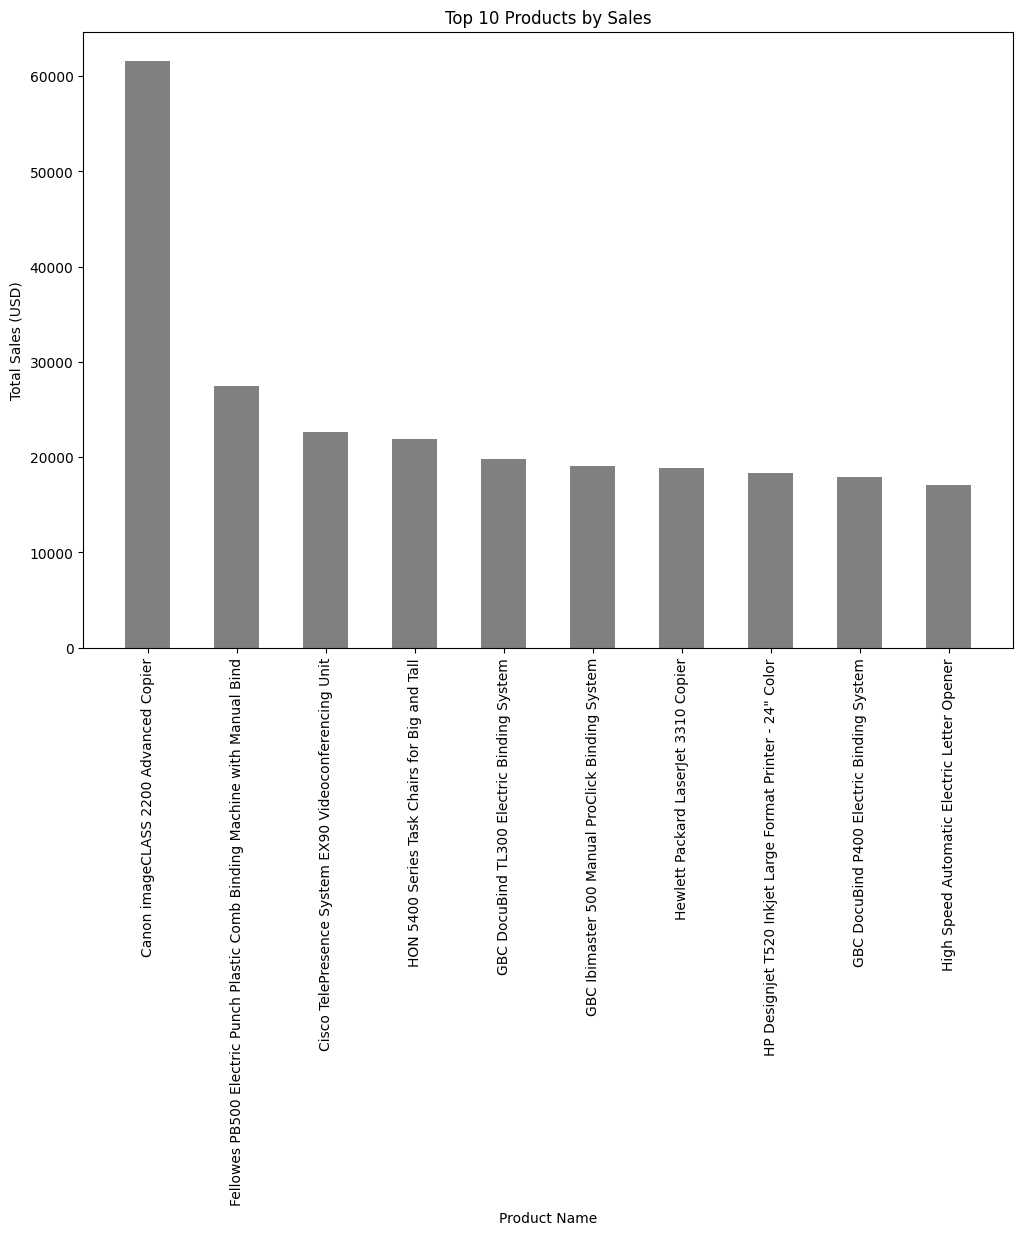

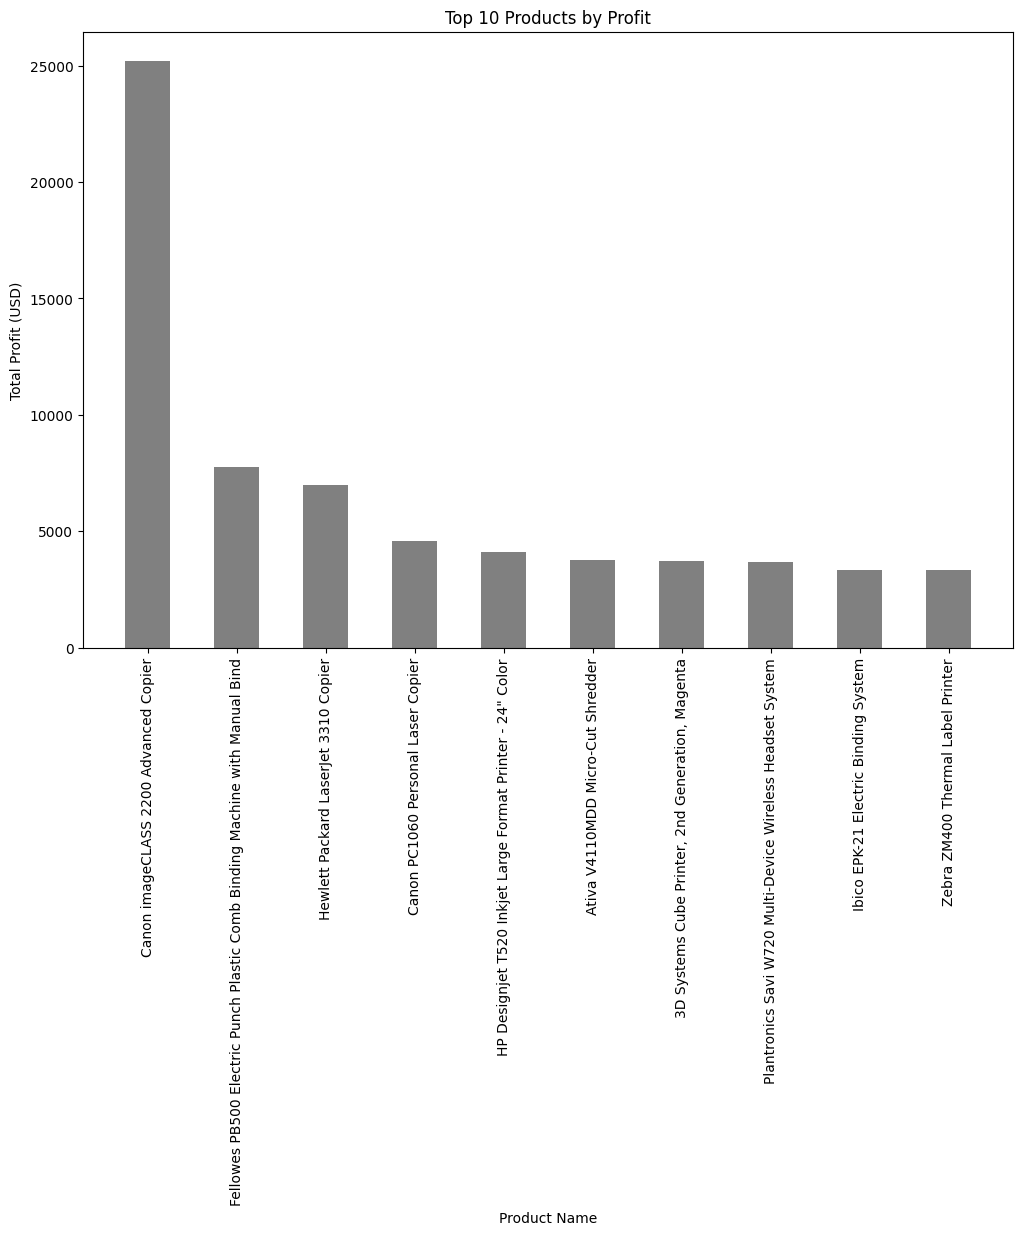

Top 10 Products by Sales:
                                           Product Name      Sales  \
404              Canon imageCLASS 2200 Advanced Copier  61599.824   
650  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384   
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480   
786       HON 5400 Series Task Chairs for Big and Tall  21870.576   
686         GBC DocuBind TL300 Electric Binding System  19823.479   
688   GBC Ibimaster 500 Manual ProClick Binding System  19024.500   
805               Hewlett Packard LaserJet 3310 Copier  18839.686   
787  HP Designjet T520 Inkjet Large Format Printer ...  18374.895   
683          GBC DocuBind P400 Electric Binding System  17965.068   
813        High Speed Automatic Electric Letter Opener  17030.312   

           Profit  
404  2.519993e+04  
650  7.753039e+03  
444 -1.811078e+03  
786  5.684342e-14  
686  2.233505e+03  
688  7.609800e+02  
805  6.983884e+03  
787  4.094977e+03  
683 -1.878166e+03  
813 -2.620048

In [109]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Step 1: Group products by Sales and Profit
# product_sales_profit = df.groupby('Product Name')[['Sales', 'Profit']].sum().reset_index()

# # Step 2: Find Top 10 Products by Sales
# top_10_sales = product_sales_profit.sort_values(by='Sales', ascending=False).head(10)

# # Step 3: Find Top 10 Products by Profit
# top_10_profit = product_sales_profit.sort_values(by='Profit', ascending=False).head(10)

# # Step 4: Visualize Top 10 Products by Sales
# plt.figure(figsize=(10, 6))
# plt.bar(top_10_sales['Product Name'], top_10_sales['Sales'], color='gray')
# plt.title('Top 10 Products by Sales')
# plt.xlabel('Product Name')
# plt.ylabel('Total Sales (USD)')
# plt.xticks(rotation=90)
# plt.show()

# # Step 5: Visualize Top 10 Products by Profit
# plt.figure(figsize=(10, 6))
# plt.bar(top_10_profit['Product Name'], top_10_profit['Profit'], color='gray')
# plt.title('Top 10 Products by Profit')
# plt.xlabel('Product Name')
# plt.ylabel('Total Profit (USD)')
# plt.xticks(rotation=90)
# plt.show()

# # Display the top 10 products by Sales and Profit
# print("Top 10 Products by Sales:\n", top_10_sales)
# print("\nTop 10 Products by Profit:\n", top_10_profit)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined
# Step 1: Group products by Sales and Profit
product_sales_profit = df.groupby('Product Name')[['Sales', 'Profit']].sum().reset_index()

# Step 2: Find Top 10 Products by Sales
top_10_sales = product_sales_profit.sort_values(by='Sales', ascending=False).head(10)

# Step 3: Find Top 10 Products by Profit
top_10_profit = product_sales_profit.sort_values(by='Profit', ascending=False).head(10)

# Step 4: Visualize Top 10 Products by Sales
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_sales['Product Name'], top_10_sales['Sales'], color='gray', width=0.5)
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)

# Save the chart
plt.savefig('top_10_products_by_sales.png')

plt.show()

# Step 5: Visualize Top 10 Products by Profit
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_profit['Product Name'], top_10_profit['Profit'], color='gray', width=0.5)
plt.title('Top 10 Products by Profit')
plt.xlabel('Product Name')
plt.ylabel('Total Profit (USD)')
plt.xticks(rotation=90)

# Save the chart
plt.savefig('top_10_products_by_profit.png')

plt.show()

# Display the top 10 products by Sales and Profit
print("Top 10 Products by Sales:\n", top_10_sales)
print("\nTop 10 Products by Profit:\n", top_10_profit)

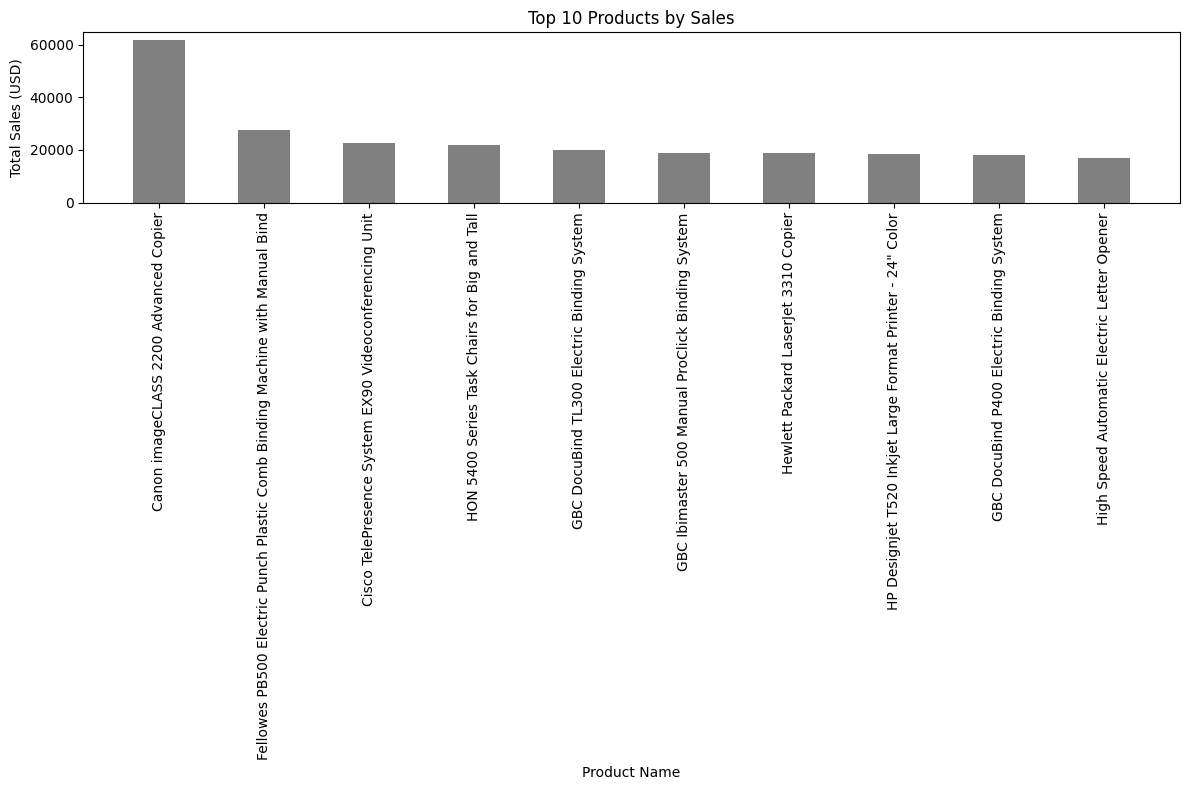

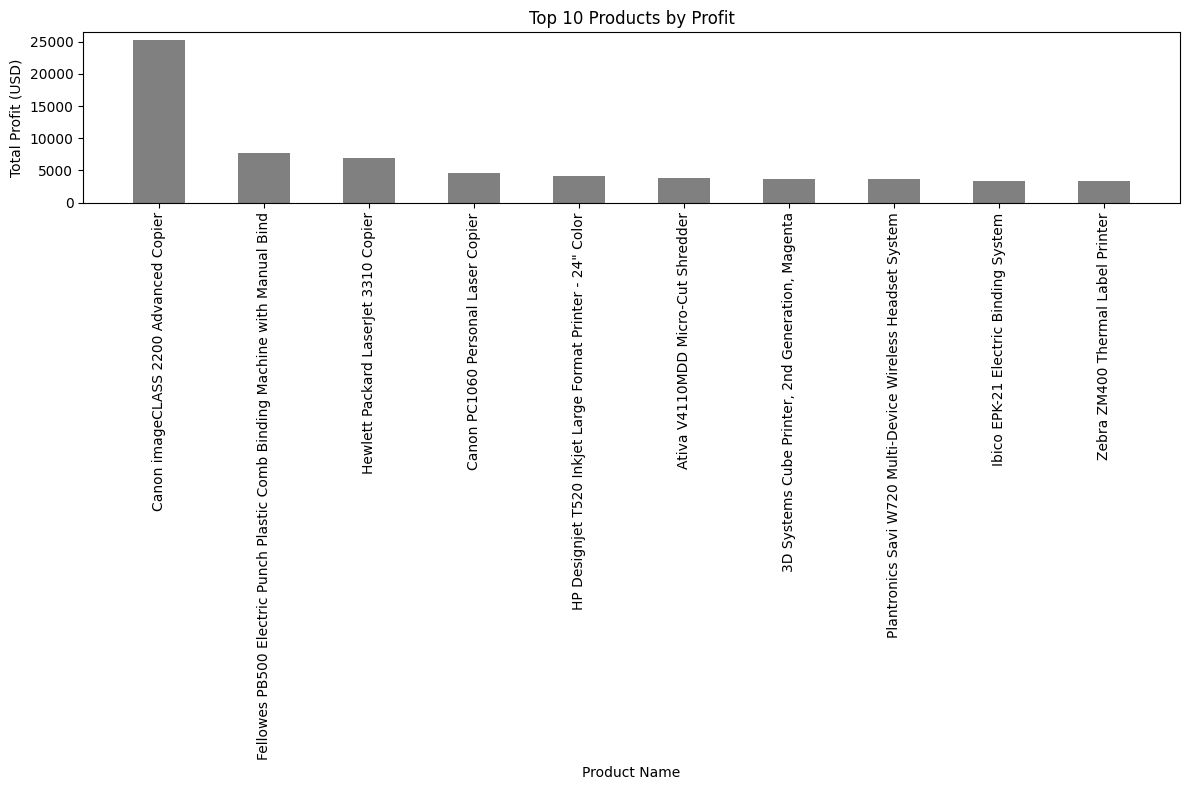

Top 10 Products by Sales:
                                           Product Name      Sales  \
404              Canon imageCLASS 2200 Advanced Copier  61599.824   
650  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384   
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480   
786       HON 5400 Series Task Chairs for Big and Tall  21870.576   
686         GBC DocuBind TL300 Electric Binding System  19823.479   
688   GBC Ibimaster 500 Manual ProClick Binding System  19024.500   
805               Hewlett Packard LaserJet 3310 Copier  18839.686   
787  HP Designjet T520 Inkjet Large Format Printer ...  18374.895   
683          GBC DocuBind P400 Electric Binding System  17965.068   
813        High Speed Automatic Electric Letter Opener  17030.312   

           Profit  
404  2.519993e+04  
650  7.753039e+03  
444 -1.811078e+03  
786  5.684342e-14  
686  2.233505e+03  
688  7.609800e+02  
805  6.983884e+03  
787  4.094977e+03  
683 -1.878166e+03  
813 -2.620048

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined
# Step 1: Group products by Sales and Profit
product_sales_profit = df.groupby('Product Name')[['Sales', 'Profit']].sum().reset_index()

# Step 2: Find Top 10 Products by Sales
top_10_sales = product_sales_profit.sort_values(by='Sales', ascending=False).head(10)

# Step 3: Find Top 10 Products by Profit
top_10_profit = product_sales_profit.sort_values(by='Profit', ascending=False).head(10)

# Step 4: Visualize Top 10 Products by Sales
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_sales['Product Name'], top_10_sales['Sales'], color='gray', width=0.5)
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the chart
plt.savefig('top_10_products_by_sales.png')

plt.show()

# Step 5: Visualize Top 10 Products by Profit
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_profit['Product Name'], top_10_profit['Profit'], color='gray', width=0.5)
plt.title('Top 10 Products by Profit')
plt.xlabel('Product Name')
plt.ylabel('Total Profit (USD)')
plt.xticks(rotation=90)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the chart
plt.savefig('top_10_products_by_profit.png')

plt.show()

# Display the top 10 products by Sales and Profit
print("Top 10 Products by Sales:\n", top_10_sales)
print("\nTop 10 Products by Profit:\n", top_10_profit)

In [113]:
import pandas as pd

# Load data
data = pd.read_csv('Superstore.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte

In [115]:
import pandas as pd

# Attempt to read the CSV with a different encoding
try:
    data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    data = pd.read_csv('Superstore.csv', encoding='cp1252')

In [117]:
!pip install chardet

In [119]:
import chardet

# Detect encoding
with open('Superstore.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

# Read the CSV using the detected encoding
data = pd.read_csv('Superstore.csv', encoding=encoding)

Detected encoding: Windows-1252


In [121]:
import pandas as pd

# Load the data with correct encoding
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

# Check data types and inspect first few rows
print(data.info())
print(data.head())

# Drop rows with missing values in critical columns
data = data.dropna(subset=['Order ID', 'Product ID', 'Quantity'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [123]:
# Create basket matrix
basket = data.groupby(['Order ID', 'Product ID'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('Order ID', inplace=True)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/3306745524.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [125]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Save the rules for further analysis
rules.to_csv('association_rules.csv', index=False)

ModuleNotFoundError: No module named 'mlxtend'

In [127]:
# Install mlxtend if it's not already installed
!pip install mlxtend

# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
data = data.dropna(subset=['Order ID', 'Product ID', 'Quantity'])

# Create basket matrix
basket = data.groupby(['Order ID', 'Product ID'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('Order ID', inplace=True)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Save rules to a CSV file
rules.to_csv('association_rules.csv', index=False)

# Visualize the top 10 association rules by lift
top_rules = rules.nlargest(10, 'lift')

plt.figure(figsize=(12, 8))
plt.barh(top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str), top_rules['lift'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_10_association_rules_by_lift.png')
plt.show()

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/2108427091.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [129]:
# Try with a lower support threshold
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Check if frequent itemsets are found
print(frequent_itemsets)

Empty DataFrame
Columns: [support, itemsets]
Index: []


/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [131]:
# Create basket matrix with boolean values
basket = data.groupby(['Order ID', 'Product ID'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('Order ID', inplace=True)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Verify the structure
print(basket.head())

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/656006471.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Product ID      FUR-BO-10000112  FUR-BO-10000330  FUR-BO-10000362  \
Order ID                                                            
CA-2014-100006                0                0                0   
CA-2014-100090                0                0                0   
CA-2014-100293                0                0                0   
CA-2014-100328                0                0                0   
CA-2014-100363                0                0                0   

Product ID      FUR-BO-10000468  FUR-BO-10000711  FUR-BO-10000780  \
Order ID                                                            
CA-2014-100006                0                0                0   
CA-2014-100090                0                0                0   
CA-2014-100293                0                0                0   
CA-2014-100328                0                0                0   
CA-2014-100363                0                0                0   

Product ID      FUR-BO-10001337 

In [133]:
# Apply Apriori algorithm with a lower support threshold
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

# Check if frequent itemsets are found
print(frequent_itemsets)

     support           itemsets
0   0.002396  (FUR-CH-10000454)
1   0.002196  (FUR-CH-10000785)
2   0.002995  (FUR-CH-10001146)
3   0.002196  (FUR-CH-10002602)
4   0.002995  (FUR-CH-10002647)
..       ...                ...
70  0.002595  (TEC-AC-10003038)
71  0.002995  (TEC-AC-10003628)
72  0.003594  (TEC-AC-10003832)
73  0.002396  (TEC-AC-10004510)
74  0.002196  (TEC-PH-10003505)

[75 rows x 2 columns]


/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [135]:
# Check the number of unique orders and products
print(f"Number of unique orders: {data['Order ID'].nunique()}")
print(f"Number of unique products: {data['Product ID'].nunique()}")

Number of unique orders: 5009
Number of unique products: 1862


In [137]:
# Convert product IDs to categorical if necessary
data['Product ID'] = data['Product ID'].astype('category')

# Verify if the transformation is correct
print(data.dtypes)

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country            object
City               object
State              object
Postal Code         int64
Region             object
Product ID       category
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object


In [139]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
data = data.dropna(subset=['Order ID', 'Product ID', 'Quantity'])

# Create basket matrix with boolean values
basket = data.groupby(['Order ID', 'Product ID'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('Order ID', inplace=True)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm with a very low support threshold
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

# Check if frequent itemsets are found
if frequent_itemsets.empty:
    print("No frequent itemsets found with the current support threshold.")
else:
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

    # Check if any rules are generated
    if rules.empty:
        print("No association rules generated with the current lift threshold.")
    else:
        # Save rules to a CSV file
        rules.to_csv('association_rules.csv', index=False)

        # Visualize the top 10 association rules by lift
        top_rules = rules.nlargest(10, 'lift')
        
        plt.figure(figsize=(12, 8))
        plt.barh(top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str), top_rules['lift'])
        plt.xlabel('Lift')
        plt.title('Top 10 Association Rules by Lift')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('top_10_association_rules_by_lift.png')
        plt.show()

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/2110511733.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


No association rules generated with the current lift threshold.


/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [141]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
data = data.dropna(subset=['Order ID', 'Product ID', 'Quantity'])

# Create basket matrix
basket = data.groupby(['Order ID', 'Product ID'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('Order ID', inplace=True)

# Convert to boolean matrix
basket = basket > 0

# Apply Apriori algorithm with a lower support threshold
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

# Check if frequent itemsets are found
if frequent_itemsets.empty:
    print("No frequent itemsets found with the current support threshold.")
else:
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

    # Check if any rules are generated
    if rules.empty:
        print("No association rules generated with the current lift threshold.")
    else:
        # Save rules to a CSV file
        rules.to_csv('association_rules.csv', index=False)

        # Visualize the top 10 association rules by lift
        top_rules = rules.nlargest(10, 'lift')
        
        plt.figure(figsize=(12, 8))
        plt.barh(top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str), top_rules['lift'])
        plt.xlabel('Lift')
        plt.title('Top 10 Association Rules by Lift')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('top_10_association_rules_by_lift.png')
        plt.show()

No association rules generated with the current lift threshold.


In [143]:
# Generate association rules with a lower lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [145]:
# Display frequent itemsets
print(frequent_itemsets)

     support           itemsets
0   0.002396  (FUR-CH-10000454)
1   0.002196  (FUR-CH-10000785)
2   0.002995  (FUR-CH-10001146)
3   0.002196  (FUR-CH-10002602)
4   0.002995  (FUR-CH-10002647)
..       ...                ...
70  0.002595  (TEC-AC-10003038)
71  0.002995  (TEC-AC-10003628)
72  0.003594  (TEC-AC-10003832)
73  0.002396  (TEC-AC-10004510)
74  0.002196  (TEC-PH-10003505)

[75 rows x 2 columns]


In [147]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
data = data.dropna(subset=['Order ID', 'Product ID', 'Quantity'])

# Create basket matrix
basket = data.groupby(['Order ID', 'Product ID'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('Order ID', inplace=True)
basket = basket > 0

# Apply Apriori algorithm with a lower support threshold
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

# Generate association rules with confidence
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Check if rules are generated
if rules_confidence.empty:
    print("No association rules generated with the current confidence threshold.")
else:
    # Save rules to a CSV file
    rules_confidence.to_csv('association_rules_confidence.csv', index=False)

    # Visualize the top 10 association rules by confidence
    top_rules_confidence = rules_confidence.nlargest(10, 'confidence')
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_rules_confidence['antecedents'].astype(str) + ' -> ' + top_rules_confidence['consequents'].astype(str), top_rules_confidence['confidence'])
    plt.xlabel('Confidence')
    plt.title('Top 10 Association Rules by Confidence')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('top_10_association_rules_by_confidence.png')
    plt.show()
    

No association rules generated with the current confidence threshold.


In [149]:
# Apply Apriori algorithm with an even lower support threshold
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Check if frequent itemsets are generated
if frequent_itemsets.empty:
    print("No frequent itemsets found with the current support threshold.")
else:
    # Generate association rules with a lower confidence threshold
    rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
    
    # Check if rules are generated
    if rules_confidence.empty:
        print("No association rules generated with the current confidence threshold.")
    else:
        # Save rules to a CSV file
        rules_confidence.to_csv('association_rules_confidence.csv', index=False)
        
        # Visualize the top 10 association rules by confidence
        top_rules_confidence = rules_confidence.nlargest(10, 'confidence')
        
        plt.figure(figsize=(10, 6))
        plt.barh(top_rules_confidence['antecedents'].astype(str) + ' -> ' + top_rules_confidence['consequents'].astype(str), top_rules_confidence['confidence'])
        plt.xlabel('Confidence')
        plt.title('Top 10 Association Rules by Confidence')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('top_10_association_rules_by_confidence.png')
        plt.show()

No association rules generated with the current confidence threshold.


In [151]:
# Check the structure of the basket matrix
print(basket.head())

Product ID      FUR-BO-10000112  FUR-BO-10000330  FUR-BO-10000362  \
Order ID                                                            
CA-2014-100006            False            False            False   
CA-2014-100090            False            False            False   
CA-2014-100293            False            False            False   
CA-2014-100328            False            False            False   
CA-2014-100363            False            False            False   

Product ID      FUR-BO-10000468  FUR-BO-10000711  FUR-BO-10000780  \
Order ID                                                            
CA-2014-100006            False            False            False   
CA-2014-100090            False            False            False   
CA-2014-100293            False            False            False   
CA-2014-100328            False            False            False   
CA-2014-100363            False            False            False   

Product ID      FUR-BO-10001337 

In [153]:
# Count occurrences of each product
product_counts = basket.sum(axis=0)
print(product_counts.sort_values(ascending=False).head(20))

Product ID
TEC-AC-10003832    18
OFF-PA-10001970    18
FUR-FU-10004270    16
TEC-AC-10003628    15
FUR-CH-10001146    15
TEC-AC-10002049    15
FUR-CH-10002647    15
OFF-BI-10002026    14
FUR-FU-10001473    14
FUR-CH-10002880    14
OFF-BI-10004632    14
OFF-BI-10001524    14
FUR-CH-10003774    14
OFF-PA-10002377    14
OFF-BI-10004140    13
OFF-BI-10000977    13
FUR-FU-10004864    13
OFF-BI-10004728    13
OFF-BI-10004970    13
OFF-BI-10000145    13
dtype: int64


In [155]:
# Apply Apriori algorithm with a lower support threshold based on product occurrence analysis
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Generate association rules with a low confidence threshold
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Check if rules are generated
if rules_confidence.empty:
    print("No association rules generated with the current confidence threshold.")
else:
    # Save rules to a CSV file
    rules_confidence.to_csv('association_rules_confidence.csv', index=False)
    
    # Visualize the top 10 association rules by confidence
    top_rules_confidence = rules_confidence.nlargest(10, 'confidence')
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_rules_confidence['antecedents'].astype(str) + ' -> ' + top_rules_confidence['consequents'].astype(str), top_rules_confidence['confidence'])
    plt.xlabel('Confidence')
    plt.title('Top 10 Association Rules by Confidence')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('top_10_association_rules_by_confidence.png')
    plt.show()

No association rules generated with the current confidence threshold.


In [157]:
# Verify the basket matrix for the top products
top_products = product_counts.index[:20]  # Top 20 products
basket_top_products = basket[top_products]

# Convert to binary matrix
basket_top_products = basket_top_products.applymap(lambda x: 1 if x > 0 else 0)

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_1872/1511953216.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_top_products = basket_top_products.applymap(lambda x: 1 if x > 0 else 0)


In [159]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets with adjusted support
frequent_itemsets_top = apriori(basket_top_products, min_support=0.005, use_colnames=True)

# Generate association rules with adjusted confidence
rules_top = association_rules(frequent_itemsets_top, metric="confidence", min_threshold=0.3)

# Check results
if rules_top.empty:
    print("No association rules generated with the current confidence threshold.")
else:
    # Save the rules
    rules_top.to_csv('association_rules_top_products.csv', index=False)

    # Display top rules
    print(rules_top.head())

/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [161]:
# Display the first few rows of the basket matrix
print(basket_top_products.head())

Product ID      FUR-BO-10000112  FUR-BO-10000330  FUR-BO-10000362  \
Order ID                                                            
CA-2014-100006                0                0                0   
CA-2014-100090                0                0                0   
CA-2014-100293                0                0                0   
CA-2014-100328                0                0                0   
CA-2014-100363                0                0                0   

Product ID      FUR-BO-10000468  FUR-BO-10000711  FUR-BO-10000780  \
Order ID                                                            
CA-2014-100006                0                0                0   
CA-2014-100090                0                0                0   
CA-2014-100293                0                0                0   
CA-2014-100328                0                0                0   
CA-2014-100363                0                0                0   

Product ID      FUR-BO-10001337 